## Home Work Three - 2025 ML Zoomcamp 

## By: Norman Angel

## Date: Oct 13, 2025

## Task

- In this homework, we will use the lead scoring dataset Bank Marketing dataset

- In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset 

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


## Data preparation

- Check if the missing values are presented in the features.
- If there are missing values:
- For caterogiral features, replace them with 'NA'
- For numerical features, replace with with 0.0


In [3]:
# Check datatypes

df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [5]:
# Check Missing values

df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [7]:
# Fill categorical missing values  in df with 'NA'

categorical = df.select_dtypes(include=['object', 'category']).columns
df[categorical] = df[categorical].fillna('NA')

In [8]:
# and numerical missing values with 0.0

numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical] = df[numerical].fillna(0.0)

In [9]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1

- What is the most frequent observation (mode) for the column industry?


In [10]:
df['industry'].mode()[0]

'retail'

## Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

- What are the two features that have the biggest correlation?


In [11]:
# Compute correlation matrix
corr_matrix = df[numerical].corr()

# Display the matrix
print(corr_matrix)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  


In [15]:
# Unstack the matrix to get pairwise correlations
corr_pairs = corr_matrix.unstack()

# Remove self-correlations (correlation of a variable with itself)
corr_pairs = corr_pairs[corr_pairs < 1]

# Get the pair with the highest absolute correlation
strongest_pair = corr_pairs.abs().sort_values(ascending=False).head(1)

print("The two features with the strongest correlation are:")
print(strongest_pair)


The two features with the strongest correlation are:
number_of_courses_viewed  converted    0.435914
dtype: float64


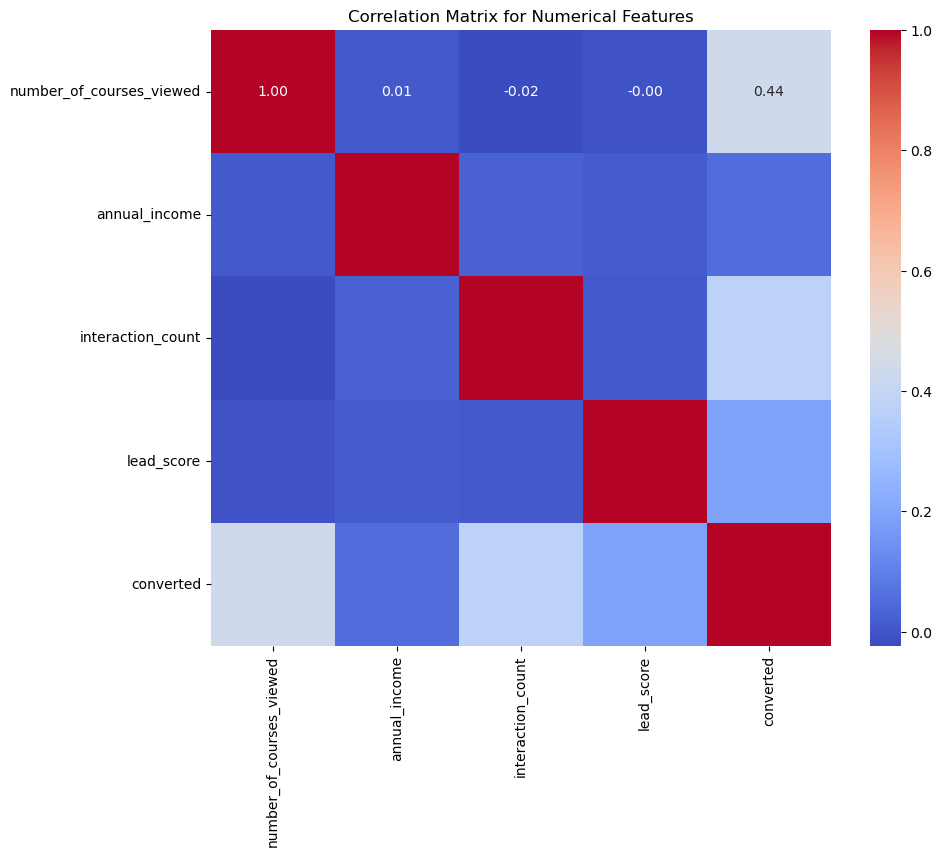

In [16]:
# Vizualize the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()


In [18]:

# Calculate correlation matrix for numerical columns only
correlation_matrix = df[numerical].corr()

# Get upper triangle of correlation matrix (to avoid duplicates and diagonal)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_corr = correlation_matrix.where(upper_triangle)

# Find the maximum correlation
max_corr = upper_corr.max().max()

# Find which pair has the maximum correlation
max_pair = upper_corr.stack().idxmax()

print(f"Highest correlation: {max_corr:.3f}")
print(f"Between features: '{max_pair[0]}' and '{max_pair[1]}'")

# Optional: Show top 5 correlated pairs
print("\nTop 5 correlated pairs:")
corr_pairs = upper_corr.stack().sort_values(ascending=False)
for i, (pair, corr) in enumerate(corr_pairs.head(5).items(), 1):
    print(f"{i}. {pair[0]} <-> {pair[1]}: {corr:.3f}")

Highest correlation: 0.436
Between features: 'number_of_courses_viewed' and 'converted'

Top 5 correlated pairs:
1. number_of_courses_viewed <-> converted: 0.436
2. interaction_count <-> converted: 0.375
3. lead_score <-> converted: 0.194
4. annual_income <-> converted: 0.053
5. annual_income <-> interaction_count: 0.027


In [19]:
# Let's also look at correlations between features (excluding target variable)
print("🔍 FEATURE-TO-FEATURE CORRELATIONS (excluding target 'converted'):")
print("=" * 70)

# Remove 'converted' from numerical features for feature-to-feature analysis
feature_cols = [col for col in numerical if col != 'converted']
feature_corr = df[feature_cols].corr()

# Find strongest feature-to-feature correlation
feature_pairs = feature_corr.unstack()
feature_pairs = feature_pairs[feature_pairs < 1]  # Remove self-correlations
strongest_feature_pair = feature_pairs.abs().sort_values(ascending=False).head(1)

print("Strongest correlation between features (excluding target):")
print(strongest_feature_pair)
print()

# Show top 5 feature-to-feature correlations
print("Top 5 feature-to-feature correlations:")
top_feature_pairs = feature_pairs.abs().sort_values(ascending=False).head(5)
for i, (pair, corr) in enumerate(top_feature_pairs.items(), 1):
    print(f"{i}. {pair[0]} <-> {pair[1]}: {corr:.3f}")

🔍 FEATURE-TO-FEATURE CORRELATIONS (excluding target 'converted'):
Strongest correlation between features (excluding target):
annual_income  interaction_count    0.027036
dtype: float64

Top 5 feature-to-feature correlations:
1. annual_income <-> interaction_count: 0.027
2. interaction_count <-> annual_income: 0.027
3. number_of_courses_viewed <-> interaction_count: 0.024
4. interaction_count <-> number_of_courses_viewed: 0.024
5. annual_income <-> lead_score: 0.016


### Data Splitting

- Split the data into train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.

In [22]:
from sklearn.model_selection import train_test_split

# First, let's separate features and target
X = df.drop('converted', axis=1)  # Features (all columns except target)
y = df['converted']  # Target variable

print("Dataset shape:", df.shape)
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target distribution:")
print(y.value_counts())

Dataset shape: (1462, 9)
Features shape: (1462, 8)
Target shape: (1462,)
Target distribution:
converted
1    905
0    557
Name: count, dtype: int64


In [23]:
# Split the data: 60% train, 20% val, 20% test
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 60% train (75% of temp), 20% val (25% of temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Data split completed!")
print("=" * 40)
print(f"Original dataset size: {len(df)}")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")
print("=" * 40)

Data split completed!
Original dataset size: 1462
Training set size: 876 (59.9%)
Validation set size: 293 (20.0%)
Test set size: 293 (20.0%)


In [24]:
# Verify the target distribution is maintained across splits (stratification)
print("Target distribution across splits:")
print("=" * 50)

print("\nTraining set:")
print(y_train.value_counts(normalize=True))

print("\nValidation set:")
print(y_val.value_counts(normalize=True))

print("\nTest set:")
print(y_test.value_counts(normalize=True))

print("\nOriginal dataset:")
print(y.value_counts(normalize=True))

Target distribution across splits:

Training set:
converted
1    0.619863
0    0.380137
Name: proportion, dtype: float64

Validation set:
converted
1    0.617747
0    0.382253
Name: proportion, dtype: float64

Test set:
converted
1    0.617747
0    0.382253
Name: proportion, dtype: float64

Original dataset:
converted
1    0.619015
0    0.380985
Name: proportion, dtype: float64


In [25]:
# Final verification - make sure target is not in feature dataframes
print("Checking if target 'converted' is in feature sets:")
print("=" * 50)
print(f"'converted' in X_train columns: {'converted' in X_train.columns}")
print(f"'converted' in X_val columns: {'converted' in X_val.columns}")
print(f"'converted' in X_test columns: {'converted' in X_test.columns}")

print(f"\nFeature columns in X_train: {list(X_train.columns)}")
print(f"Shape verification:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Checking if target 'converted' is in feature sets:
'converted' in X_train columns: False
'converted' in X_val columns: False
'converted' in X_test columns: False

Feature columns in X_train: ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score']
Shape verification:
X_train: (876, 8), y_train: (876,)
X_val: (293, 8), y_val: (293,)
X_test: (293, 8), y_test: (293,)


## Question 3

Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the biggest mutual information score?

- industry
- location
- lead_source
- employment_status

In [26]:
from sklearn.metrics import mutual_info_score

# Define the categorical variables to analyze
categorical_vars = ['industry', 'location', 'lead_source', 'employment_status']

print("Mutual Information Scores with target 'converted':")
print("=" * 55)

# Calculate mutual information for each categorical variable using training set only
mi_scores = {}

for var in categorical_vars:
    # Calculate mutual information score between the categorical variable and target
    mi_score = mutual_info_score(X_train[var], y_train)
    mi_score_rounded = round(mi_score, 2)
    mi_scores[var] = mi_score_rounded
    print(f"{var:20} | {mi_score_rounded:.2f}")

print("=" * 55)

# Find the variable with the highest mutual information score
best_var = max(mi_scores, key=mi_scores.get)
best_score = mi_scores[best_var]

print(f"Highest MI score: {best_var} ({best_score:.2f})")
print(f"\nAnswer: {best_var}")

Mutual Information Scores with target 'converted':
industry             | 0.01
location             | 0.00
lead_source          | 0.03
employment_status    | 0.01
Highest MI score: lead_source (0.03)

Answer: lead_source


## Question 4

Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
```python
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
```

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

In [27]:
# Import required libraries for one-hot encoding and logistic regression
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Setting up one-hot encoding for categorical variables...")

# Convert training data to dictionary format for DictVectorizer
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')

print(f"Training data converted: {len(train_dicts)} records")
print(f"Validation data converted: {len(val_dicts)} records")

Setting up one-hot encoding for categorical variables...
Training data converted: 876 records
Validation data converted: 293 records


In [28]:
# Apply one-hot encoding using DictVectorizer
dv = DictVectorizer(sparse=False)

# Fit and transform training data
X_train_encoded = dv.fit_transform(train_dicts)

# Transform validation data (don't fit again)
X_val_encoded = dv.transform(val_dicts)

print("One-hot encoding completed!")
print("=" * 50)
print(f"Original features: {X_train.shape[1]}")
print(f"Encoded features: {X_train_encoded.shape[1]}")
print(f"Training set shape: {X_train_encoded.shape}")
print(f"Validation set shape: {X_val_encoded.shape}")

# Show some of the feature names created by one-hot encoding
feature_names = dv.get_feature_names_out()
print(f"\nFirst 10 feature names: {feature_names[:10]}")
print(f"Last 10 feature names: {feature_names[-10:]}")

One-hot encoding completed!
Original features: 8
Encoded features: 31
Training set shape: (876, 31)
Validation set shape: (293, 31)

First 10 feature names: ['annual_income' 'employment_status=NA' 'employment_status=employed'
 'employment_status=self_employed' 'employment_status=student'
 'employment_status=unemployed' 'industry=NA' 'industry=education'
 'industry=finance' 'industry=healthcare']
Last 10 feature names: ['lead_source=social_media' 'location=NA' 'location=africa'
 'location=asia' 'location=australia' 'location=europe'
 'location=middle_east' 'location=north_america' 'location=south_america'
 'number_of_courses_viewed']


In [29]:
# Train the logistic regression model with specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

print("Training logistic regression model...")
print("Model parameters:")
print(f"- solver: {model.solver}")
print(f"- C: {model.C}")
print(f"- max_iter: {model.max_iter}")
print(f"- random_state: {model.random_state}")

# Fit the model on encoded training data
model.fit(X_train_encoded, y_train)

print("\nModel training completed!")

Training logistic regression model...
Model parameters:
- solver: liblinear
- C: 1.0
- max_iter: 1000
- random_state: 42

Model training completed!


In [30]:
# Make predictions on validation set
y_pred = model.predict(X_val_encoded)

# Calculate accuracy on validation set
accuracy = accuracy_score(y_val, y_pred)
accuracy_rounded = round(accuracy, 2)

print("Model Performance on Validation Set:")
print("=" * 40)
print(f"Accuracy: {accuracy:.6f}")
print(f"Accuracy (rounded to 2 decimals): {accuracy_rounded}")

print(f"\nAnswer: {accuracy_rounded}")

# Additional performance details
print(f"\nDetailed Results:")
print(f"Correct predictions: {(y_pred == y_val).sum()}")
print(f"Total predictions: {len(y_val)}")
print(f"Validation set size: {len(y_val)}")

Model Performance on Validation Set:
Accuracy: 0.730375
Accuracy (rounded to 2 decimals): 0.73

Answer: 0.73

Detailed Results:
Correct predictions: 214
Total predictions: 293
Validation set size: 293


## Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model using the same features and parameters as in Q4 (without rounding).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
- 'industry'
- 'employment_status'  
- 'lead_score'

Note: The difference doesn't have to be positive.

In [32]:
# First, train the baseline model (same as Q4 but without rounding accuracy)
print("Training baseline model with all features...")

# Use the same encoding and model from Q4
baseline_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
baseline_model.fit(X_train_encoded, y_train)

# Get baseline accuracy (without rounding)
baseline_pred = baseline_model.predict(X_val_encoded)
baseline_accuracy = accuracy_score(y_val, baseline_pred)

print(f"Baseline accuracy (all features): {baseline_accuracy:.6f}")
print(f"Total features in model: {X_train_encoded.shape[1]}")
print("=" * 50)

Training baseline model with all features...
Baseline accuracy (all features): 0.730375
Total features in model: 31


In [35]:
# Features to test for elimination
features_to_test = ['industry', 'employment_status', 'lead_score']

print("Feature Elimination Analysis:")
print("=" * 60)

# Dictionary to store results
elimination_results = {}

for feature in features_to_test:
    print(f"\nTesting exclusion of feature: '{feature}'")
    
    # Create datasets without the specific feature
    X_train_without = X_train.drop(columns=[feature])
    X_val_without = X_val.drop(columns=[feature])
    
    # Convert to dictionaries for encoding
    train_dicts_without = X_train_without.to_dict(orient='records')
    val_dicts_without = X_val_without.to_dict(orient='records')
    
    # Apply one-hot encoding
    dv_without = DictVectorizer(sparse=False)
    X_train_encoded_without = dv_without.fit_transform(train_dicts_without)
    X_val_encoded_without = dv_without.transform(val_dicts_without)
    
    # Train model without this feature
    model_without = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_without.fit(X_train_encoded_without, y_train)
    
    # Get accuracy without this feature
    pred_without = model_without.predict(X_val_encoded_without)
    accuracy_without = accuracy_score(y_val, pred_without)
    
    # Calculate the difference (baseline - without_feature)
    difference = baseline_accuracy - accuracy_without
    
    # Store results
    elimination_results[feature] = {
        'accuracy_without': accuracy_without,
        'difference': difference
    }
    
    print(f"  Features used: {X_train_encoded_without.shape[1]} (vs {X_train_encoded.shape[1]} baseline)")
    print(f"  Accuracy without '{feature}': {accuracy_without:.6f}")
    print(f"  Difference from baseline: {difference:.6f}")

print("\n" + "=" * 60)

Feature Elimination Analysis:

Testing exclusion of feature: 'industry'
  Features used: 23 (vs 31 baseline)
  Accuracy without 'industry': 0.730375
  Difference from baseline: 0.000000

Testing exclusion of feature: 'employment_status'
  Features used: 26 (vs 31 baseline)
  Accuracy without 'employment_status': 0.733788
  Difference from baseline: -0.003413

Testing exclusion of feature: 'lead_score'
  Features used: 30 (vs 31 baseline)
  Accuracy without 'lead_score': 0.730375
  Difference from baseline: 0.000000



In [36]:
# Summary of results
print("FEATURE ELIMINATION SUMMARY:")
print("=" * 60)
print(f"Baseline accuracy (all features): {baseline_accuracy:.6f}")
print()

print("Results by feature exclusion:")
for feature, results in elimination_results.items():
    print(f"{feature:20} | Accuracy: {results['accuracy_without']:.6f} | Difference: {results['difference']:+.6f}")

print("\n" + "=" * 60)

# Find the feature with the smallest difference (least useful)
least_useful = min(elimination_results.keys(), key=lambda x: elimination_results[x]['difference'])
smallest_diff = elimination_results[least_useful]['difference']

print(f"Feature with SMALLEST difference (least useful): '{least_useful}'")
print(f"Difference: {smallest_diff:.6f}")
print(f"\nAnswer: {least_useful}")

# Show ranking of features by usefulness (smallest to largest difference)
print(f"\nFeature ranking by difference (least to most useful):")
sorted_features = sorted(elimination_results.items(), key=lambda x: x[1]['difference'])
for i, (feature, results) in enumerate(sorted_features, 1):
    print(f"{i}. {feature:20} | Difference: {results['difference']:+.6f}")

FEATURE ELIMINATION SUMMARY:
Baseline accuracy (all features): 0.730375

Results by feature exclusion:
industry             | Accuracy: 0.730375 | Difference: +0.000000
employment_status    | Accuracy: 0.733788 | Difference: -0.003413
lead_score           | Accuracy: 0.730375 | Difference: +0.000000

Feature with SMALLEST difference (least useful): 'employment_status'
Difference: -0.003413

Answer: employment_status

Feature ranking by difference (least to most useful):
1. employment_status    | Difference: -0.003413
2. industry             | Difference: +0.000000
3. lead_score           | Difference: +0.000000


## Question 6

Now let's train a regularized logistic regression.

Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
Train models using all the features as in Q4.
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?
- 0.01
- 0.1
- 1
- 10
- 100

Note: If there are multiple options, select the smallest C.

In [40]:
# Test different C values for regularized logistic regression
C_values = [0.01, 0.1, 1, 10, 100]

print("Regularized Logistic Regression - Testing different C values:")
print("=" * 65)

# Dictionary to store results
regularization_results = {}

# Use the same encoded data from Q4 (X_train_encoded, X_val_encoded)
print(f"Using encoded features: {X_train_encoded.shape[1]} features")
print(f"Training set size: {X_train_encoded.shape[0]}")
print(f"Validation set size: {X_val_encoded.shape[0]}")
print()

for C in C_values:
    print(f"Testing C = {C}")
    
    # Train logistic regression with the current C value
    # Keep same parameters as Q4 except for C
    model_reg = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model_reg.fit(X_train_encoded, y_train)
    
    # Make predictions on validation set
    y_pred_reg = model_reg.predict(X_val_encoded)
    
    # Calculate accuracy and round to 3 decimal places
    accuracy_reg = accuracy_score(y_val, y_pred_reg)
    accuracy_rounded = round(accuracy_reg, 3)
    
    # Store results
    regularization_results[C] = accuracy_rounded
    
    print(f"  Accuracy: {accuracy_reg:.6f}")
    print(f"  Accuracy (rounded to 3 decimals): {accuracy_rounded}")
    print()

print("=" * 65)

Regularized Logistic Regression - Testing different C values:
Using encoded features: 31 features
Training set size: 876
Validation set size: 293

Testing C = 0.01
  Accuracy: 0.733788
  Accuracy (rounded to 3 decimals): 0.734

Testing C = 0.1
  Accuracy: 0.730375
  Accuracy (rounded to 3 decimals): 0.73

Testing C = 1
  Accuracy: 0.730375
  Accuracy (rounded to 3 decimals): 0.73

Testing C = 10
  Accuracy: 0.730375
  Accuracy (rounded to 3 decimals): 0.73

Testing C = 100
  Accuracy: 0.730375
  Accuracy (rounded to 3 decimals): 0.73



In [38]:
# Summary of regularization results
print("REGULARIZATION RESULTS SUMMARY:")
print("=" * 65)

print("C Value | Accuracy (3 decimals)")
print("-" * 32)
for C, accuracy in regularization_results.items():
    print(f"{C:7} | {accuracy:.3f}")

print("\n" + "=" * 65)

# Find the best C value (highest accuracy)
best_C = max(regularization_results.keys(), key=lambda x: regularization_results[x])
best_accuracy = regularization_results[best_C]

print(f"Best C value: {best_C}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Check if there are ties and select smallest C in case of tie
max_accuracy = max(regularization_results.values())
tied_C_values = [C for C, acc in regularization_results.items() if acc == max_accuracy]

if len(tied_C_values) > 1:
    print(f"\nMultiple C values achieved the same best accuracy ({max_accuracy:.3f}):")
    for C in sorted(tied_C_values):
        print(f"  C = {C}")
    
    # Select smallest C as instructed
    smallest_best_C = min(tied_C_values)
    print(f"\nSelecting smallest C: {smallest_best_C}")
    print(f"\nAnswer: {smallest_best_C}")
else:
    print(f"\nAnswer: {best_C}")

# Show ranking from best to worst
print(f"\nRanking (best to worst accuracy):")
sorted_results = sorted(regularization_results.items(), key=lambda x: x[1], reverse=True)
for i, (C, accuracy) in enumerate(sorted_results, 1):
    print(f"{i}. C = {C:5} | Accuracy = {accuracy:.3f}")

REGULARIZATION RESULTS SUMMARY:
C Value | Accuracy (3 decimals)
--------------------------------
   0.01 | 0.734
    0.1 | 0.730
      1 | 0.730
     10 | 0.730
    100 | 0.730

Best C value: 0.01
Best accuracy: 0.734

Answer: 0.01

Ranking (best to worst accuracy):
1. C =  0.01 | Accuracy = 0.734
2. C =   0.1 | Accuracy = 0.730
3. C =     1 | Accuracy = 0.730
4. C =    10 | Accuracy = 0.730
5. C =   100 | Accuracy = 0.730


## Module 3 Notes: 

- https://github.com/anormanangel/Machine-Learning-Zoomcamp/blob/main/03-Classification/Churn%20Prediction.ipynb